# Introdction




## The data belongs to car insurance company. <br>`symboling` refers to the risk associated with this car relative to its set.<br> `normalized-losses` is the average loss per car per year. 

## Questions:


---


What questions we wish to ask?

> What are the features affecting the price of the car?


In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read dataset
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Adding a correlation heat map to check if there are relations between features

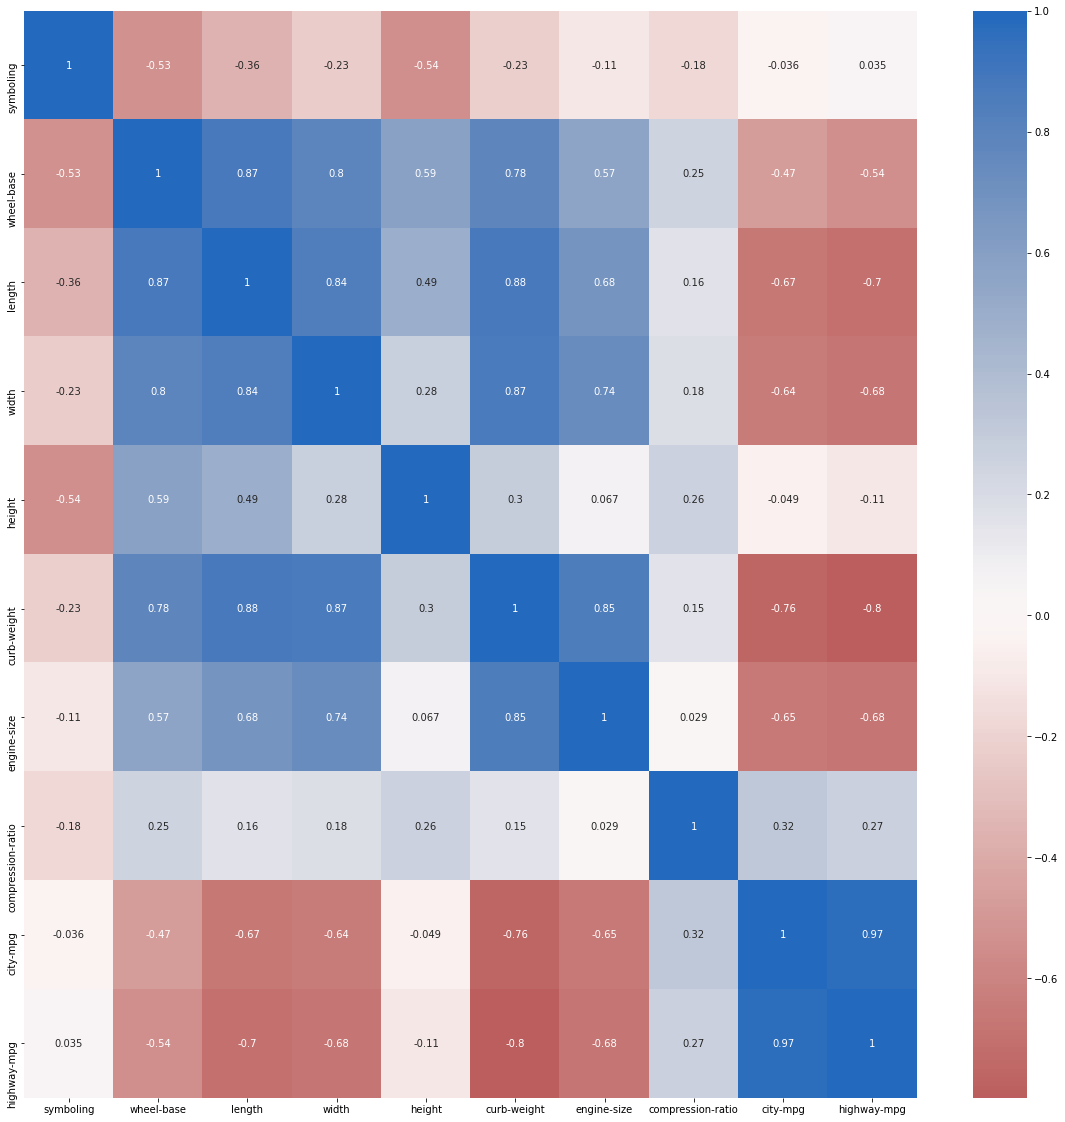

In [5]:
corr = df.corr() # correlation map
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr, annot=True, cmap= 'vlag_r', center = 0)

**From the previous heat map it is shown that there are correlation between some features like :**
>1. wheel-base &
>> a. length\
>> b. width\
>> c. curb-weight
> 2. length &
>> a. width\
>> b. curb-weight
> 3. width & 
>> a. curb-weight  
>> b. engine-size
> 4. engine-size &
>> a. curb-weight  
> 5. highway-mpg &
>> a. city-mpg\
>> b. curb-weight  
>> c. length
> 6. Price &
>> Width\
>> Curb-weight\
>> Engine-size\
>> Horsepower

#Data Cleaning 

---



## Looking for missing data in normalized-losses column

In [6]:
pd.to_numeric(df['normalized-losses'], errors='coerce').isnull().sum()

41

In [7]:
df[df['normalized-losses'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [8]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')

In [9]:
df['normalized-losses'].value_counts()

161.0    11
91.0      8
150.0     7
104.0     6
128.0     6
134.0     6
102.0     5
85.0      5
103.0     5
168.0     5
74.0      5
95.0      5
94.0      5
65.0      5
122.0     4
148.0     4
118.0     4
93.0      4
106.0     4
115.0     3
125.0     3
83.0      3
101.0     3
137.0     3
154.0     3
188.0     2
81.0      2
192.0     2
158.0     2
145.0     2
113.0     2
110.0     2
153.0     2
129.0     2
194.0     2
197.0     2
87.0      2
89.0      2
119.0     2
164.0     2
108.0     2
231.0     1
107.0     1
78.0      1
256.0     1
98.0      1
121.0     1
77.0      1
142.0     1
90.0      1
186.0     1
Name: normalized-losses, dtype: int64

We Could fill the null values with the column mean

In [10]:
normalized_losses_mean = df['normalized-losses'].mean()
normalized_losses_mean

122.0

In [11]:
df['normalized-losses'].fillna(normalized_losses_mean, inplace = True)

In [12]:
df['normalized-losses'].isnull().sum() # Check

0

## Cleaning num-of-doors

In [13]:
df['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [14]:
df['num-of-doors'].replace('four', 4, inplace = True)
df['num-of-doors'].replace('two', 2, inplace = True)
df['num-of-doors'] = pd.to_numeric(df['num-of-doors'], errors='coerce')

df['num-of-doors'].value_counts()

4.0    114
2.0     89
Name: num-of-doors, dtype: int64

In [15]:
df['num-of-doors'].isnull().sum()

2

In [16]:
# Dropping the 2 null values
df.dropna(inplace = True)

In [17]:
df['num-of-doors'].isnull().sum()

0

##Other numerical columns that should be treated `peak-rpm`, `horsepower`, `bore`, `stroke` and `price`

In [18]:
df['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4200', '4350', '4500', '5200', '4150', '5600', '5900',
       '5750', '?', '5250', '4900', '4400', '6600', '5300'], dtype=object)

In [19]:
pd.to_numeric(df['peak-rpm'], errors='coerce').isnull().sum()

2

Dropping the non numerical

In [20]:
df.drop(df[pd.to_numeric(df['peak-rpm'], errors='coerce').isnull()].index, inplace= True)

In [21]:
pd.to_numeric(df['price'], errors= 'coerce').isnull().sum()

4

Dropping the records with missing prices

In [22]:
df.drop(df[pd.to_numeric(df['price'], errors='coerce').isnull()].index, inplace= True)

In [23]:
pd.to_numeric(df['bore'], errors= 'coerce').isnull().sum()

4

In [24]:
df.drop(df[pd.to_numeric(df['bore'], errors='coerce').isnull()].index, inplace= True)

In [25]:
pd.to_numeric(df['stroke'], errors= 'coerce').isnull().sum()

0

Changing data type for qualitative columns

In [26]:
df[['price', 'horsepower', 'peak-rpm', 'num-of-doors']] = df[['price', 'horsepower', 'peak-rpm', 'num-of-doors']].astype(int)
df[['bore', 'stroke', 'normalized-losses']] = df[['bore', 'stroke', 'normalized-losses']].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized-losses  193 non-null    float64
 2   make               193 non-null    object 
 3   fuel-type          193 non-null    object 
 4   aspiration         193 non-null    object 
 5   num-of-doors       193 non-null    int64  
 6   body-style         193 non-null    object 
 7   drive-wheels       193 non-null    object 
 8   engine-location    193 non-null    object 
 9   wheel-base         193 non-null    float64
 10  length             193 non-null    float64
 11  width              193 non-null    float64
 12  height             193 non-null    float64
 13  curb-weight        193 non-null    int64  
 14  engine-type        193 non-null    object 
 15  num-of-cylinders   193 non-null    object 
 16  engine-size        193 non

##Checking outliers for numerical variables

''

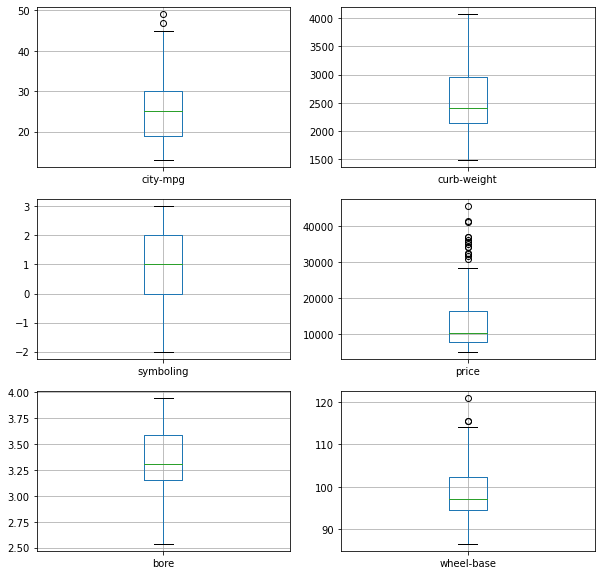

In [28]:
plt.figure(figsize=[10,10])
plt.subplot(3,2,1)
df.boxplot(column=['city-mpg'])
plt.subplot(3,2,2)
df.boxplot(column=['curb-weight'])
plt.subplot(3,2,3)
df.boxplot(column=['symboling'])
plt.subplot(3,2,4)
df.boxplot(column=['price'])
plt.subplot(3,2,5)
df.boxplot(column=['bore'])
plt.subplot(3,2,6)
df.boxplot(column=['wheel-base'])
;

In [29]:
df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,121.284974,3.160622,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,1.235582,32.342674,0.989583,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,95.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,1.000000,122.000000,4.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,134.000000,4.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


# Exploring Data

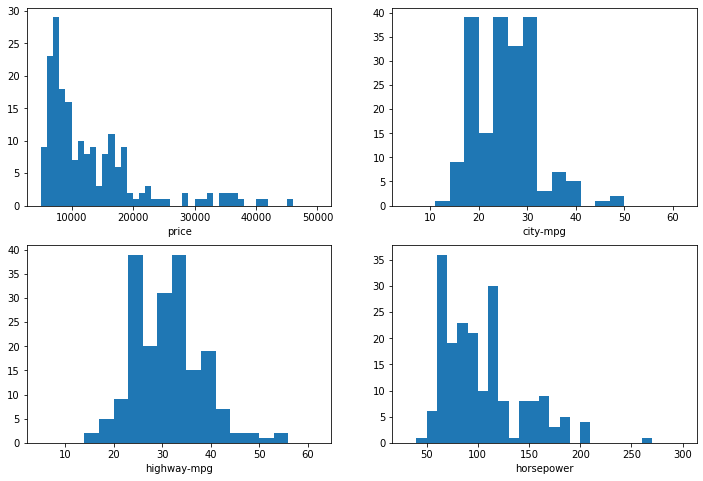

In [30]:
plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
bin_edges = np.arange(5000, 50000+1000, 1000)
plt.hist(data=df, x='price', bins = bin_edges)
plt.xlabel('price')
plt.subplot(2,2,2)
bin_edges = np.arange(5, 60+3, 3)
plt.hist(data=df, x='city-mpg', bins = bin_edges)
plt.xlabel('city-mpg')
plt.subplot(2,2,3)
bin_edges = np.arange(5, 60+3, 3)
plt.hist(data=df, x='highway-mpg', bins = bin_edges)
plt.xlabel('highway-mpg')
plt.subplot(2,2,4)
bin_edges = np.arange(30, 300+10, 10)
plt.hist(data=df, x='horsepower', bins = bin_edges)
plt.xlabel('horsepower');

Price seems to be right skewed with too many outliers.

''

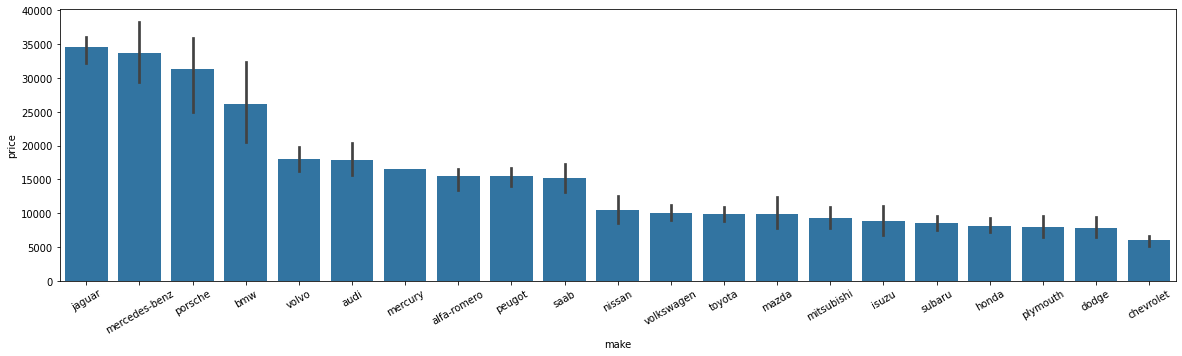

In [31]:
base_color = sns.color_palette()[0]
plt.figure(figsize=[20,5])
order = df.groupby('make').price.mean().sort_values(ascending = False).index
sns.barplot(data= df , x='make', y='price', color=base_color, order= order)
plt.xticks(rotation = 30)
;

In [32]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


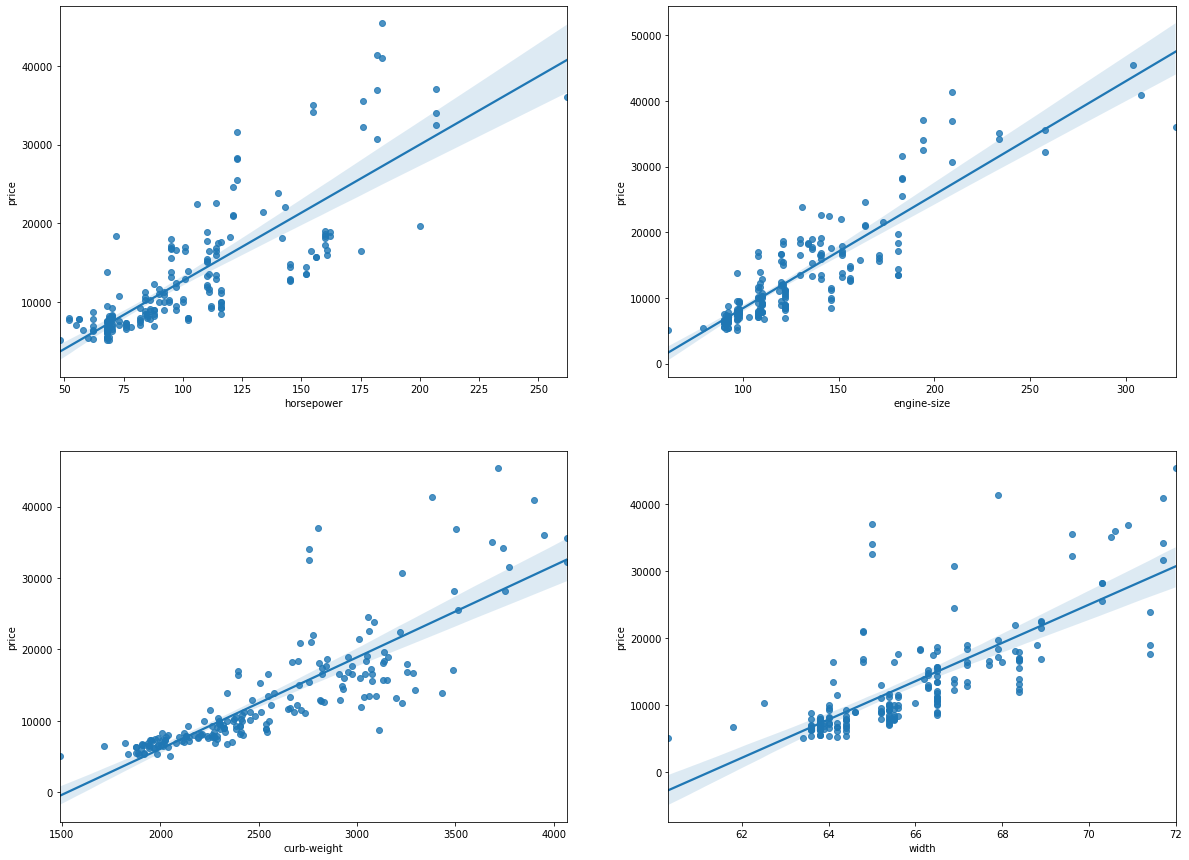

In [33]:
plt.figure(figsize=[20,15])
plt.subplot(2,2,1)
sns.regplot(data=df, x='horsepower', y='price')
plt.subplot(2,2,2)
sns.regplot(data=df, x='engine-size', y='price')
plt.subplot(2,2,3)
sns.regplot(data=df, x='curb-weight', y='price')
plt.subplot(2,2,4)
sns.regplot(data=df, x='width', y='price');

# Encoding some categorical Features

--------

## Encoding the body-style feature

In [34]:
df_new = df

In [35]:
df_new['body-style'].value_counts()

sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [36]:
# We can select more or less
dummies_body = pd.get_dummies(df_new['body-style'], drop_first=True)
dummies_make = pd.get_dummies(df_new['make'], drop_first=True)
dummies_wheels = pd.get_dummies(df_new['drive-wheels'], drop_first=True) 


In [37]:
df_new = df_new.join(dummies_body).join(dummies_make).join(dummies_wheels)
df_new.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,hardtop,hatchback,sedan,wagon,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,fwd,rwd
0,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Question#1 What are the features affecting the price of the car?

From exploratory part of the analysis we found the price is most afftect with the following variables:
> Width\
> Curb-weight\
> Engine-size\
> Horsepower  
> city-mpg  
> highway-mpg

### Building Linear Regression Model between the above models

In [38]:
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
df['intercept'] = 1
df.rename(columns={'curb-weight' : 'curb_weight', 'engine-size' : 'engine_size', 'city-mpg':'city_mpg',
                    'highway-mpg':'highway_mpg'}, inplace = True) # for some reason VIF check doesn't work on columns with `-` inbetween
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb_weight,engine-type,num-of-cylinders,engine_size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city_mpg,highway_mpg,price,intercept
0,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,1
1,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1
2,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,1
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,1


#### Multicolinearity Check

In [39]:
y, X = dmatrices('price~width+curb_weight+engine_size+horsepower+city_mpg+highway_mpg', df, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3376.8,Intercept
1,4.1,width
2,8.6,curb_weight
3,6.2,engine_size
4,6.1,horsepower
5,22.1,city_mpg
6,22.5,highway_mpg


As excepted city_mpg and highway_mpg are dependant varaibles. Deleting `highway_mpg` and try the check again

In [40]:
y, X = dmatrices('price~width+curb_weight+engine_size+horsepower+city_mpg', df, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3266.0,Intercept
1,4.1,width
2,8.1,curb_weight
3,6.2,engine_size
4,5.9,horsepower
5,4.2,city_mpg


All VIFs are below 10, which means that those variables are not correlated to each other and we can use them all.

In [41]:
reg_m = sm.OLS(df['price'], df[['intercept', 'width', 'curb_weight', 'engine_size', 'horsepower', 'city_mpg']])
res = reg_m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     178.3
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           3.63e-69
Time:                        10:49:17   Log-Likelihood:                -1840.9
No. Observations:                 193   AIC:                             3694.
Df Residuals:                     187   BIC:                             3713.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -5.234e+04    1.4e+04     -3.728      0.000      -8e+04   -2.46e+04
width         619.2442    234.275      2.643      0.009     157.083    1081.405
curb_weight     2.0797      1.334      1.559      0.121      -0.552       4.711
engine_size    94.5528     14.716      6.425      0.000      65.522     123.584
horsepower     52.5937     15.823      3.324      0.001      21.379      83.808
city_mpg       76.3065     79.448      0.960      0.338     -80.424     233.037
==============================================================================
Omnibus:                       23.751   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.054
Skew:                           0.527   Prob(JB):                     6.73e-13
Kurtosis:                       5.420   Cond. No.                     1.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We got a good model with all variables statistically significant except the `curb_weight` and `city_mpg`.  
Trying again without the `curb_weight` nor `city_mpg` variabale:  


In [42]:
reg_m = sm.OLS(df['price'], df[['intercept', 'width', 'engine_size', 'horsepower']])
res = reg_m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     295.4
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           4.52e-71
Time:                        10:49:17   Log-Likelihood:                -1842.3
No. Observations:                 193   AIC:                             3693.
Df Residuals:                     189   BIC:                             3706.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -5.902e+04   1.05e+04     -5.621      0.000   -7.97e+04   -3.83e+04
width         818.5003    171.557      4.771      0.000     480.088    1156.913
engine_size   106.0220     12.930      8.199      0.000      80.516     131.528
horsepower     46.2852     12.166      3.805      0.000      22.288      70.283
==============================================================================
Omnibus:                       23.511   Durbin-Watson:                   0.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.315
Skew:                           0.544   Prob(JB):                     4.37e-12
Kurtosis:                       5.307   Cond. No.                     7.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
pred_price = -59020 + (df.width * 818.5) + (df.engine_size * 106) + (df.horsepower * 46.3)

### Trying out with modeling with Machine Learning

In [44]:
df_new.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,hardtop,hatchback,sedan,wagon,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,fwd,rwd
0,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Sci-Kit Learn Linear Regression using the previous numerical features + categorical features

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#features = df_new['width', 'engine-size', 'horsepower']
X = df_new[['width', 'engine-size', 'horsepower', 'wheel-base','curb-weight','bore',
            'hardtop',
            'hatchback',	'sedan',	'wagon',	'audi',	'bmw',	'chevrolet',	'dodge',	'honda',
            'isuzu',	'jaguar',	'mazda',	'mercedes-benz',	'mercury',	'mitsubishi',	'nissan',
            'peugot',	'plymouth',	'porsche',	'saab',	'subaru',	'toyota',	'volkswagen',	'volvo',
            'fwd',	'rwd',]]
y = df_new['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Mean Root squared error: %.2f'% np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2: %.2f'% r2_score(y_test, y_pred))
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))

Mean Root squared error: 2218.88
R2: 0.93
Mean Absolute Error: 1686.54


Using RandomForestRessor with same features

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Root squared error: %.2f'% np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2: %.2f'% r2_score(y_test, y_pred))
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))

Mean Root squared error: 2123.40
R2: 0.93
Mean Absolute Error: 1401.93


# Limitation

> Dataset was limited in number of rows, thus the outliers were kept.  
> We dropped 12 records total.  
> We wished to estimate the normalized losses but it had many NAN values
